In [59]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import math
import glob
import re
DATA_FOLDER = '/Users/nourghaliaabassi/Desktop/ada/ADA2017-Tutorials/02 - Intro to Pandas/Data/'
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')
data = pd.read_excel(DATA_FOLDER+"/titanic.xls")
df1 = pd.DataFrame({'attribute': list(data),'type':list(data.dtypes)})
df1['Min'] = data.select_dtypes(exclude=[object]).min()



In [60]:
df1.set_index('attribute', inplace=True) 
df1.loc[data.select_dtypes(exclude=[object]).min().index,'Min']=data.select_dtypes(exclude=[object]).min() 
df1.loc[data.select_dtypes(exclude=[object]).max().index,'Max']=data.select_dtypes(exclude=[object]).max()

In [61]:

data['cabin']

0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
5           E12
6            D7
7           A36
8          C101
9           NaN
10      C62 C64
11      C62 C64
12          B35
13          NaN
14          A23
15          NaN
16      B58 B60
17      B58 B60
18          D15
19           C6
20          D35
21          D35
22         C148
23          NaN
24          C97
25          NaN
26          B49
27          B49
28          C99
29          C52
         ...   
1279        NaN
1280        NaN
1281        NaN
1282        NaN
1283        NaN
1284        NaN
1285        NaN
1286        NaN
1287        NaN
1288        NaN
1289        NaN
1290        NaN
1291        NaN
1292        NaN
1293        NaN
1294        NaN
1295        NaN
1296        NaN
1297        NaN
1298        NaN
1299        NaN
1300        NaN
1301        NaN
1302        NaN
1303        NaN
1304        NaN
1305        NaN
1306        NaN
1307        NaN
1308        NaN
Name: cabin, dtype: obje

In [62]:
cabin1 = data['cabin'].fillna('')

final_cab = []

i = 0
for elem in cabin1:
        if (len(elem.split())>1):
            tmp = re.findall("\d+", elem)
            if (len(tmp) == 2):
                tmp[0] = int(tmp[0])
                tmp[1] = int(tmp[1])
                tmp2 = list(range(tmp[0],tmp[1]+1))
                for elem2 in tmp2:
                    final_cab.append(elem[0] + str(elem2))
            if (len(tmp) > 2):
                for elem3 in elem.split():
                    final_cab.append(elem3)
        else: 
            if elem != '': 
                final_cab.append(elem)
        i=i+1



In [63]:
length = len(set(final_cab))
distinct_cab = np.zeros([length,2]).astype('str')
distinct_cab[:,0] = np.asarray(list(set(final_cab)))
distinct_cab[:,1] = pd.to_numeric(distinct_cab[:,1])
for elem in data['cabin']: 
    i = 0
    for elem2 in distinct_cab[:,0]:
        if elem == elem2:
            distinct_cab[i][1] = pd.to_numeric(distinct_cab[i][1]) + 1
        i = i+1
distinct_cab

array([['C7', '2.0'],
       ['C6', '2.0'],
       ['E34', '3.0'],
       ['C111', '1.0'],
       ['D35', '2.0'],
       ['D38', '1.0'],
       ['D10', '0.0'],
       ['B39', '1.0'],
       ['C93', '2.0'],
       ['B52', '0.0'],
       ['B78', '2.0'],
       ['B18', '2.0'],
       ['C70', '1.0'],
       ['C45', '1.0'],
       ['C89', '2.0'],
       ['D20', '2.0'],
       ['A19', '1.0'],
       ['A26', '1.0'],
       ['B82', '0.0'],
       ['D15', '2.0'],
       ['B80', '1.0'],
       ['D43', '1.0'],
       ['C2', '2.0'],
       ['C31', '2.0'],
       ['B56', '0.0'],
       ['D17', '2.0'],
       ['C53', '1.0'],
       ['B58', '0.0'],
       ['C82', '1.0'],
       ['B59', '0.0'],
       ['D45', '1.0'],
       ['B28', '2.0'],
       ['C80', '2.0'],
       ['D56', '1.0'],
       ['E67', '2.0'],
       ['B60', '0.0'],
       ['C22', '0.0'],
       ['B50', '1.0'],
       ['C116', '2.0'],
       ['E39', '0.0'],
       ['B19', '1.0'],
       ['A18', '1.0'],
       ['B84', '0.0'],
       ['D12

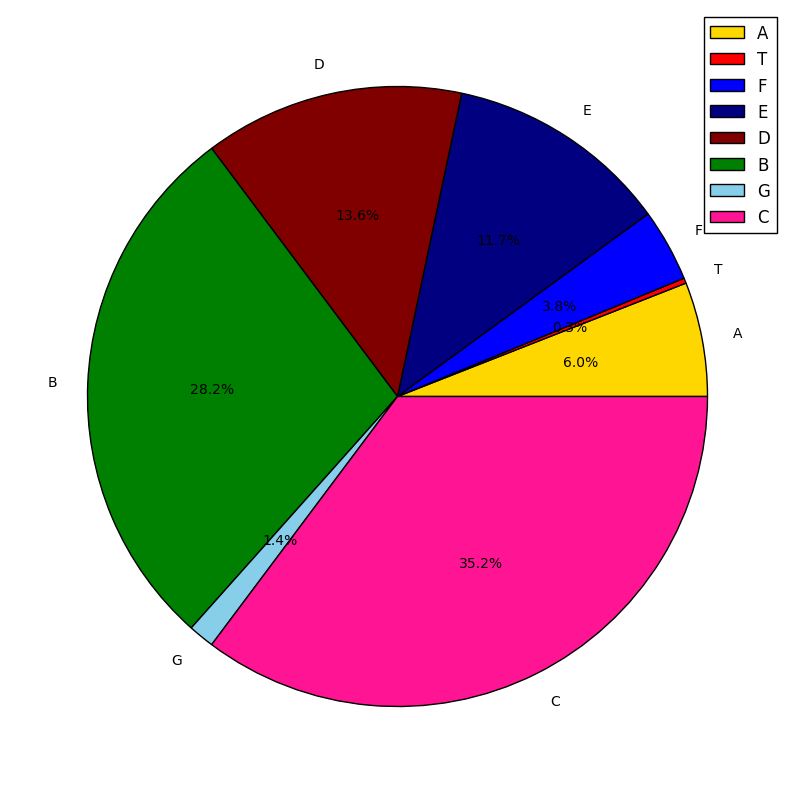

In [83]:
distinct_cab = pd.DataFrame()

final_tab = []

for elem in final_cab:
    final_tab.append(elem[0])
final_tab = list(set(final_tab))

length = len(final_tab)
zeros = np.zeros(length)

for elem in final_cab: 
    ind = 0
    for elem2 in final_tab:
        if elem[0] == elem2:
            zeros[ind] = zeros[ind] + 1
        ind=ind+1

distinct_cab['Cabin_floor'] = final_tab
distinct_cab['Number_of_persons'] = zeros/len(final_cab)
colors = ['gold', 'red', 'blue', 'navy', 'maroon', 'green', 'skyblue', 'deeppink']

fig = plt.figure(figsize=(10,10))

plt.pie(distinct_cab['Number_of_persons'], labels = distinct_cab['Cabin_floor'], colors=colors,autopct='%1.1f%%')
plt.legend(distinct_cab['Cabin_floor'])
plt.show()